In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt

#Reading in data from csv
trends_df = pd.read_csv('Resources/trends.csv')
trends_df

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [2]:
#Getting only data from 2020
tr20 = trends_df[trends_df['year'] == 2020]
tr20

,location,year,category,rank,query
23975,Global,2020,Searches,1,Coronavirus
23976,Global,2020,Searches,2,Election results
23977,Global,2020,Searches,3,Kobe Bryant
23978,Global,2020,Searches,4,Zoom
23979,Global,2020,Searches,5,IPL
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [3]:
#Dictionary of terms for cleaning data, mainly translations
terms20_replace = {'coronavirus':'Coronavirus',
                   'Коронавирус':'Coronavirus',
                   'Coronavírus':'Coronavirus',
                   'coronavírus':'Coronavirus',
                   'Koronavirus':'Coronavirus',
                   'Koroonavirus':'Coronavirus',
                   'فيروس كورونا':'Coronavirus',
                   'Κορωνοϊός':'Coronavirus',
                   '新型冠狀病毒':'Coronavirus',
                   'Koronavírus':'Coronavirus',
                   'Virus Corona':'Coronavirus',
                   'קורונה':'Coronavirus',
                   '新型コロナウイルス感染症':'Coronavirus',
                   'Koronawirus':'Coronavirus',
                   'كوفيد-19':'Coronavirus',
                   '코로나 바이러스 19':'Coronavirus',
                   '武漢肺炎':'Coronavirus',
                   'โควิด-19':'Coronavirus',
                   'Corona Virüsü':'Coronavirus',
                   'Covid 19':'Coronavirus',
                   'Elecciones Estados Unidos':'US Election',
                   'Elecciones en Estados Unidos':'US Election',
                   'Elecciones Estados Unidos 2020':'US Election',
                   'US election':'US Election',
                   'US elections':'US Election',
                   'US Elections 2020':'US Election',
                   'US Election 2020':'US Election',
                   'US election 2020':'US Election',
                   'US Wahl':'US Election',
                   'US Wahlen 2020':'US Election',
                   'Выборы в США':'US Election',
                   'election américaine / verkiezingen Amerika':'US Election',
                   'Eleições EUA':'US Election',
                   'Volby USA':'US Election',
                   'Voľby USA':'US Election',
                   'Výsledky volieb 2020':'US Election',
                   'USA-valg':'US Election',
                   'USA vaalit':'US Election',
                   'Election américaine':'US Election',
                   '美國大選':'US Election',
                   '美國總統大選':'US Election',
                   'Amerikai elnökválasztás':'US Election',
                   'US election results':'US Election',
                   'US Election Results':'US Election',
                   'US Presidential Election':'US Election',
                   'Elezioni USA':'US Election',
                   '大統領選挙':'US Election',
                   'Verkiezingen Amerika':'US Election',
                   'Wybory USA':'US Election',
                   'Presidential election 2020':'US Election',
                   'Alegeri SUA':'US Election',
                   'US elections update':'US Election',
                   '미국 대선':'US Election',
                   'elecciones eeuu':'US Election',
                   'Elecciones en EEUU':'US Election',
                   'USA-valet':'US Election',
                   'Election results':'US Election',
                   'Bầu cử Tổng thống Mỹ':'US Election',
                   '高比拜仁':'Kobe Bryant',
                   'קובי בריאנט':'Kobe Bryant',
                   'Коби Брайант':'Kobe Bryant',
                   'Ким Чен Ын':'Kim Jong Un',
                   'Kim Čong-un':'Kim Jong Un',
                   'Kim Jong-un':'Kim Jong Un',
                   '金正恩':'Kim Jong Un',
                   'Kim Dzong Un':'Kim Jong Un',
                   'Джо Байден':'Joe Biden',
                   '拜登':'Joe Biden',
                   'بايدن':'Joe Biden',
                   'Indian Premier League':'IPL',
                   'IPL 2020':'IPL'}

In [4]:
#Cleaning dataframe
tr20['query'] = tr20['query'].replace(terms20_replace)

#Assigning values for plotting
#Using sample terms from the top terms given by Google Trends in year 2020
cv_20 = len(tr20[tr20['query'].str.contains('Coronavirus')])
ue_20 = len(tr20[tr20['query'].str.contains('US Election')])
kb_20 = len(tr20[tr20['query'].str.contains('Kobe Bryant')])
jb_20 = len(tr20[tr20['query'].str.contains('Joe Biden')])
zm_20 = len(tr20[tr20['query'].str.contains('Zoom','zoom')])
kj_20 = len(tr20[tr20['query'].str.contains('Kim Jong Un')])
nr_20 = len(tr20[tr20['query'].str.contains('Naya Rivera')])
ip_20 = len(tr20[tr20['query'].str.contains('IPL')])

C:\Users\Ray\AppData\Local\Temp/ipykernel_11180/2999390690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr20['query'] = tr20['query'].replace(terms20_replace)


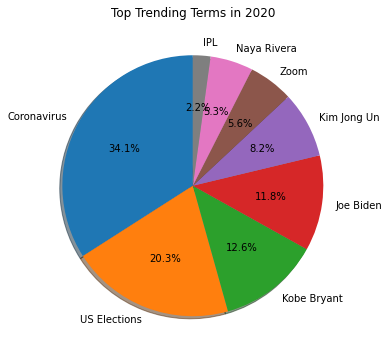

In [5]:
#Graph 1
#What are the top trending results? How can this be defined with the data at hand?

#List all values of term totals
terms20c = [cv_20, ue_20, kb_20, jb_20, kj_20, zm_20, nr_20,ip_20]
terms20n = ['Coronavirus','US Elections','Kobe Bryant','Joe Biden','Kim Jong Un','Zoom','Naya Rivera','IPL']

plt.figure(figsize=(6, 6))
plt.pie(terms20c, labels=terms20n, shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Top Trending Terms in 2020')
plt.savefig('Images/toptrends2020.png')
plt.show()

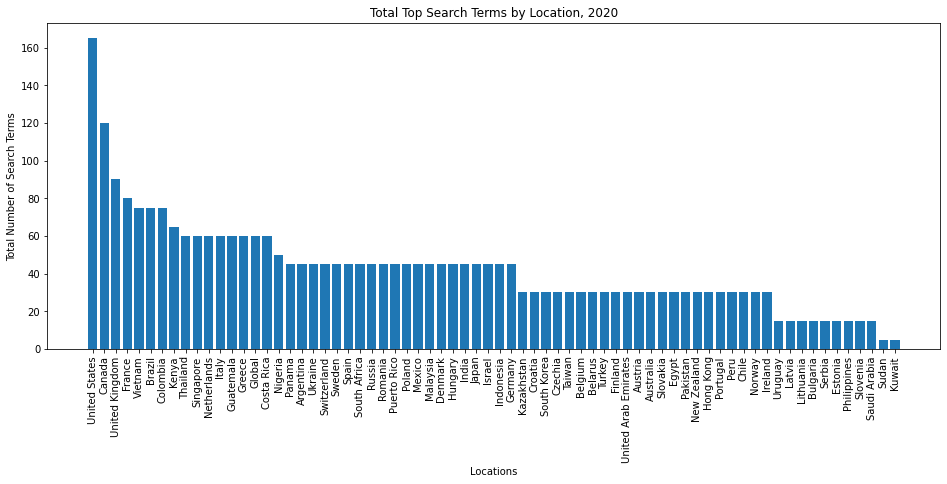

In [6]:
#Graph 2
#Are these trends definitive of the entire population?

#Getting total number of top terms in each country
loc20 = tr20['location'].value_counts()

#List of all locations
in_loc = loc20.index

#Plotting
plt.figure(figsize=(16, 6))
plt.bar(in_loc, loc20)
plt.xlabel('Locations')
plt.ylabel('Total Number of Search Terms')
plt.xticks(rotation='vertical')
plt.title('Total Top Search Terms by Location, 2020')
plt.savefig('Images/loctotalterms2020.png')
plt.show()